<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch15_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch15 - Notebook : Intégration sur un segment**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#fenêtre graphique
x_min = -2
x_max = 5
pas_x = 1
pas_y = 1
y_min = -4
y_max = 10
liste_x = list(np.arange(x_min, x_max + pas_x, pas_x))
liste_y = list(np.arange(y_min, y_max + pas_y, pas_y))

def centrax() :
    '''paramétrage esthétique des axes dans la représentation graphique d'une fonction'''
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.axis([ -2, 4, -1, 7 ])
    ax.set_xticks([ k for k in range (x_min, x_max + 1) ])
    ax.set_yticks([ k for k in range (y_min, y_max + 1) ])

## **Visualisation de l'équation différentielle $y' = y$**

Imaginons une telle fonction $f$ qui passerait par le point de coordonnées (1;3) :

alors, on aurait $f(1) = 3$ et $f'(1) = 3$, ce qui donnerait une tangente de pente 3 en ce point (1;3)

### **pente en un point**

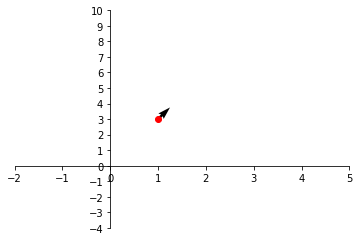

In [ ]:
X = [ 1 ]
Y = [ 3 ]

dx = 0.5
dy = Y[0]*dx # y' = dy/dx et y' = y, on substitue

U = [  dx ]
V = [  dy ]

plt.plot(X[0],Y[0],"or")
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=2)   # trace une flèche du point (x, y) au point (x+u, y+v)
                                                                            # scale divise la longueur de la flèche
centrax()
plt.show()


### **Champ de pentes**

Bon début !

Tentons de faire de même sur tous les points à coordonnées entières du quadrillage...

In [ ]:
def champ_de_pentes(X,Y, style_point) :
    for x in X :
        for y in Y:
            dy = y*dx #, y' = dy/dx et y' = y, on substitue
            U =  [ dx ]
            V =  [ dy ]
            plt.plot(x,y,style_point)
            plt.quiver(x, y, U, V, angles='xy', scale_units='xy', scale=2)  # trace une flèche du point (x, y) au point (x+u, y+v)
            centrax()                                                            # scale divise la longueur de la flèche


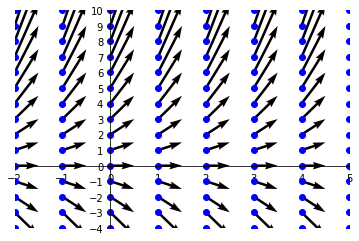

In [ ]:
X = liste_x
#X = list(np.arange(x_min, x_max + dx, dx))
dx = 1
Y = liste_y
#Y = list(np.arange(y_min, y_max + dx, dx))

champ_de_pentes(X,Y,"ob")



**Ceci s'appelle un "champ de pentes" ou "champ de tangentes"**



### **Courbe d'une solution approchée : "trajectoire"**

Traçons maintenant une courbe solution approchée, que l'on appelle une **"trajectoire"**, avec le procédé d'Euler : une fois le premier point (x,y) placé, puisqu'on ne peut pas calculer le y suivant vu qu'on ne dispose pas de la fonction f, on le remplace par sa valeur approchée : y + dy (on prend un point de la tangente à $C_f$ au lieu de prendre le point de $C_f$.

Et on réitère le processus.
Autrment dit : on place un point dans le champ de pente... et on suit les flèches !

**Python** : méthode ***quiver*** de *MatPlotLib.PyPlot*, qui permet de dessiner des flèches, rien de particulier à connaître là-dessus...

In [ ]:
# "conditions initiales"
x_0 = 0
y_0 = 1

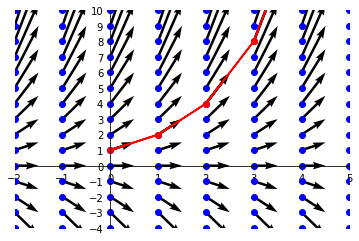

In [ ]:
champ_de_pentes(X,Y,"ob")

dx = 1
x = x_0
liste_xx = [x]
y = y_0
liste_yy = [y]

dy = y*dx
style_point = "or"

# vers la droite
while x <= x_max + dx :
    plt.plot(x,y,style_point)
    plt.quiver(x, y, [dx], [dy], angles='xy', scale_units='xy', scale=2)
    x = x + dx
    y = y + dy
    dy = y*dx # y' = dy/dx et y' = y, on substitue
    liste_xx.append(x)
    liste_yy.append(y)
    plt.plot(liste_xx,liste_yy,color = "red")

Ajoutons la portion de courbe approchée située à gauche du point initial...

In [ ]:
def trace_courbe_app(x,y,sens):
    dx = 1
    liste_xx = [x]
    liste_yy = [y]

    dy = y*dx
    style_point = "or"

    while (x <= x_max + dx) and (x >=  x_min) :
        plt.plot(x,y,style_point)
        plt.quiver(x, y, [dx], [dy], angles='xy', scale_units='xy', scale=2)
        x = x + dx - 2*dx *(sens=="gauche") # booléen qui vaut 0 si le sens est "droite", et 1 s'il vaut "gauche"
        y = y + dy - 2*dy *(sens=="gauche")
        dy = y*dx # y' = dy/dx et y' = y, on substitue
        liste_xx.append(x)
        liste_yy.append(y)
        plt.plot(liste_xx,liste_yy,color = "red")



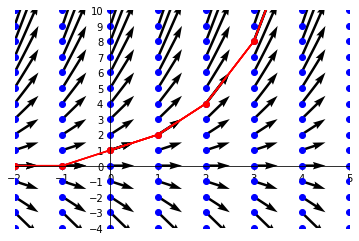

In [ ]:
champ_de_pentes(X,Y,"ob")


def trajectoire(x_0,y_0) :
    trace_courbe_app(x_0,y_0,"droite")
    trace_courbe_app(x_0,y_0,"gauche")
trajectoire(0,1)

Visualisons plusieurs trajectoires selon les condidtions initiales :

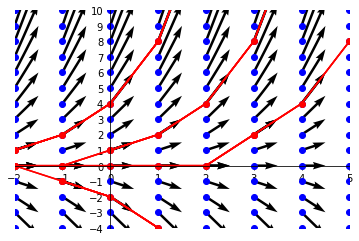

In [ ]:
champ_de_pentes(X,Y,"ob")

trajectoire(0,1)
trajectoire(3,2)
trajectoire(-1,-1)
trajectoire(-2,1)



**Exercice :**
Faire les transformations nécessaires pour visualiser le champ de pentes et quelques trajectoires de l'équation différentielle : $y' = \dfrac{-1}{3} y$